In [1]:
import json
from pprint import pprint
from termcolor import colored
from colored import fg, bg, attr
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# if using a Jupyter notebook, includue:
%matplotlib inline
data_file = "../notebook/predictor_result/TACRED_predictor.jsonl"
id2name = "../data/id2name.json"

color = bg('yellow_1') + fg('black')
reset = attr('reset')
blue = "blue"
green = "green"

print()

with open(id2name, 'r') as fp:
    id2name = json.load(fp)


In [2]:
def change_word_by_entity(entity_str, this_sentence,i,color):
        if list(map(lambda x: x.lower(), this_sentence[i:i + len(entity_str.split(" "))])) == entity_str.split():
            this_sentence = this_sentence[:i] + [colored(w, color, attrs=['bold']) for w in entity_str.split()] + \
                            this_sentence[i + len(entity_str.split(" ")):]
        return this_sentence


In [3]:
preffix = ""
def _show_sentence(head,tail,this_sentence,relation,correct_relation = None, is_prediction = False,prob : str = "",score: str = ""):
    print(preffix + "head:", colored(head, 'blue', attrs=['bold']), "  ,  ", "tail", colored(tail, 'green', attrs=['bold']))          
    this_sentence = this_sentence.split()
    for i, word in enumerate(this_sentence):
            if word.lower() == head.split()[0]:
                this_sentence = change_word_by_entity(head, this_sentence,i,blue)
            if word.lower() == tail.split()[0]:
                this_sentence = change_word_by_entity(tail, this_sentence,i,green)
    color = 'yellow' if correct_relation is None or relation == correct_relation else 'grey'
    if is_prediction: color = "red"
    if len(prob) > 0:
        print(preffix + colored(relation, color,attrs=['bold']) + "\t", " ".join(this_sentence) +" " + colored(prob, "magenta",attrs=['bold'])+"; "+ 
              colored(score, "magenta",attrs=['bold']))
    else:
        print(preffix + colored(relation, color,attrs=['bold']) + "\t", " ".join(this_sentence))

In [4]:
def show_set(data):
    correct_relation = data['correct_relation']
    prediction = data["prediction"]
    query = data['query']
    head = data['query_head']
    tail = data['query_tail']
    probability = data['probability'].replace("'","")[1:-1].split(",")
    scores = data['scores']
    _show_sentence(head,tail,query,correct_relation)
    print()

    for k in range(5):
        this_sentence = data["sentence_" +str(k)]
        head = data['sentence_'+str(k)+'_head']
        tail = data['sentence_'+str(k)+'_tail']
        relation = data['sentence_'+str(k)+'_relation']
        _show_sentence(head,tail,this_sentence,relation,correct_relation,  k == int(prediction),probability[k],
                       "{:.2f}".format(scores[k]))
    print()
    return correct_relation
        

In [5]:
total_wrong = 0
total_correct = 0
result_per_type = {}
correct_scroes = []
wrong_scores = []
pred_list = []
gold_list = []
wrong_prediction_which_rel = {}
with open(data_file) as f:
    for ex_index,line in enumerate(f,1):
        data = json.loads(line)
        scores = data['scores']
        pred_rel = data['sentence_' + data["prediction"] +'_relation']
        pred_score = scores[int(data["prediction"])]
        the_gold_rel = data['correct_relation']
        gold_list.append(the_gold_rel)
        pred_list.append(pred_rel)
        if data['answer'] == "wrong":
            assert pred_rel != the_gold_rel
            if not the_gold_rel in wrong_prediction_which_rel:
                wrong_prediction_which_rel[the_gold_rel] = Counter()
            wrong_prediction_which_rel[the_gold_rel].update([pred_rel])
            total_wrong +=1
            print("wrong example number: ",total_wrong,  "example number: ", ex_index)
            show_set(data)
            print()
            wrong_scores.append(pred_score)
            result_per_type[the_gold_rel] = result_per_type.get(the_gold_rel,[[],[]])
            result_per_type[the_gold_rel][0].append(data)
            
            
        else:
            result_per_type[the_gold_rel] = result_per_type.get(the_gold_rel,[[],[]])
            result_per_type[the_gold_rel][1].append(data)
            correct_scroes.append(pred_score)
            total_correct +=1





wrong example number:  1 example number:  6
head: sean preston   ,   tail britney spears
per:parents	 On the Net : Rounding out the top 10 : Sam Alexis Woods , daughter of Tiger Woods and his wife , Elin ; Cruz Beckham , son of David and Victoria Beckham ; Matilda Rose Ledger , daughter of Michelle Williams and the late Heath Ledger ; David Banda , son of Madonna and Guy Ritchie ; sean preston Federline , son of britney spears and Kevin Federline ; and Sam Sheen , daughter of Denise Richards and Charlie Sheen .

head: arsenal   ,   tail everton
org:member_of	 Football : arsenal 's six appeal too much for everton 0.00; 44.56
head: professional rodeo cowboys association   ,   tail colorado
org:stateorprovince_of_headquarters	 But a spokesperson for the professional rodeo cowboys association , based in colorado Springs , colorado , said Wednesday she had not heard of a ban anywhere else .  0.00; 38.55
head: jefferson j. deblanc   ,   tail louise deblanc
per:spouse	 President Harry S. Trum

wrong example number:  60 example number:  309
head: dee dee myers   ,   tail myers
per:alternate_names	 dee dee myers -- One of only a few female pundits on the broadcast networks , myers offers fresh views that the old boys often miss .

head: it   ,   tail sldn
org:alternate_names	 Labels : `` celibacy '' , activism , DADT , DNC , DOMA , military , protests , sldn it 's gon na be a freakin ' circus outside that dinner . 0.89; 48.53
head: explorer   ,   tail heart failure
per:cause_of_death	 The renowned mountain photographer , explorer and cartographer died from heart failure Wednesday .  0.00; 42.05
head: zubaydah   ,   tail abu zubaydah
per:alternate_names	 But his comments in Guantánamo about his relationship with abu zubaydah struck me as enormously significant while I was researching The Guantánamo Files , and remain so to this day , as they cast important light on a fierce debate within the Bush administration that has raged since shortly after zubaydah was captured in the Pak

head: vernon bellecourt   ,   tail minnesota
per:stateorprovince_of_birth	 vernon bellecourt -- whose Ojibwe name , WaBun-Inini , means `` Man of Dawn '' or `` Daybreak '' -- was born on the White Earth Indian Reservation in minnesota .  0.00; 39.57


wrong example number:  116 example number:  519
head: citibank   ,   tail she
org:shareholders	 That day she called citibank , which administers her MasterCard account , and won a provisional victory .

head: she   ,   tail violating a virginia law requiring segregated seating in public transportation
per:charges	 But she refused to pay a $ 10 fine for violating a virginia law requiring segregated seating in public transportation . 0.73; 54.73
head: he   ,   tail mexican
per:origin	 For his heroic actions , Herrera also received Mexico 's highest award for valor , which was awarded to him because he was still a mexican citizen when he was fighting in Europe .  0.00; 45.17
head: rothman   ,   tail theresa
per:children	 In addition to Andre

head: pamela gardner ahearn   ,   tail alexandria
per:city_of_death	 pamela gardner ahearn , who served nine years as chief of protocol at the US House of Representatives after earlier experience with the State Department 's Office of Protocol and as Elizabeth Taylor 's executive assistant , died March 26 of a heart attack at her home in alexandria , Va .  0.00; 41.79


wrong example number:  175 example number:  746
head: aaa   ,   tail latch open
no_relation	 You trust aaa to be able to get inside the door quickly and without damage and pop the latch open , which is why you 're calling them .

head: vernon bellecourt   ,   tail minneapolis
per:city_of_death	 vernon bellecourt , who fought to restore land and dignity to Native Americans and against the use of Indian nicknames for sports teams as a longtime leader of the American Indian Movement ( AIM ) , died Oct 13 of complications of pneumonia at a minneapolis hospital . 0.00; 42.71
head: al-khawinay   ,   tail defaming the presiden

head: marywood university   ,   tail scranton
org:city_of_headquarters	 `` You do not want to be caught in that air , '' said Dr. Kenneth Rundell , the director of the Human Performance Laboratory at marywood university in scranton , Pa. .  0.00; 40.69
head: chris dodd   ,   tail connecticut
per:stateorprovinces_of_residence	 Sen chris dodd of connecticut , a close family friend , will also be on board .  0.00; 40.96
head: vernon bellecourt dead   ,   tail 75
per:age	 Native American Rights Activist vernon bellecourt dead at 75  0.62; 48.27


wrong example number:  232 example number:  989
head: manila economic and cultural office   ,   tail philippines
org:parents	 Ties between the philippines and Taiwan are at their best in years after strained relations due to disputes over aviation rights during 1998-2000 and later the Spratly Islands , said Antonio Basilio , managing director and resident representative of the manila economic and cultural office ( MECO ) -- the philippines ' offic

In [6]:
print(total_wrong/(total_correct+total_wrong))
print((total_correct+total_wrong))

0.233
1000


In [7]:
for k,v in result_per_type.items():
    print("acc for ", k)
#     print("total from this category:",(len(v[0])+len(v[1])))
    print(len(v[1])/ (len(v[0])+len(v[1]) ))

acc for  org:members
0.47619047619047616
acc for  org:dissolved
0.9444444444444444
acc for  per:title
0.9583333333333334
acc for  per:date_of_death
0.8076923076923077
acc for  per:parents
0.7741935483870968
acc for  per:stateorprovince_of_death
0.7777777777777778
acc for  org:stateorprovince_of_headquarters
0.7777777777777778
acc for  per:city_of_death
0.9354838709677419
acc for  per:date_of_birth
0.9032258064516129
acc for  per:origin
0.8333333333333334
acc for  per:city_of_birth
0.7083333333333334
acc for  per:siblings
0.6428571428571429
acc for  per:country_of_death
0.6666666666666666
acc for  org:member_of
0.6363636363636364
acc for  per:employee_of
0.5652173913043478
acc for  per:charges
1.0
acc for  org:alternate_names
0.8076923076923077
acc for  per:schools_attended
0.85
acc for  per:spouse
0.7272727272727273
acc for  org:number_of_employees/members
0.9259259259259259
acc for  per:country_of_birth
0.875
acc for  per:children
0.7777777777777778
acc for  org:top_members/employees


In [8]:
# check similarity between relations on train and dev
wrong_scores = np.array(wrong_scores)
correct_scroes = np.array(correct_scroes)


In [9]:
print(wrong_scores.mean())
print(wrong_scores.std())
print()
print(correct_scroes.mean())
print(correct_scroes.std())

53.46217437875117
4.194282589964405

57.90822727646013
6.311382454720917


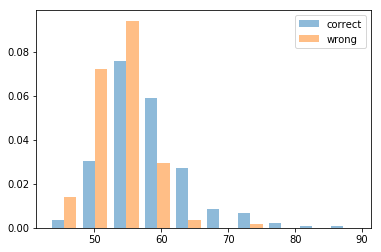

In [10]:
bins = [35,45,55,60,65,70]
plt.hist([correct_scroes,wrong_scores], 10, alpha=0.5, label=['correct','wrong'],density=True)
# plt.hist(wrong_scores, 10, alpha=0.5, label='wrong')
plt.legend(loc='upper right')
# plt.show()

In [11]:
# check unigrams intersection with other relations, both on tokens and entities
# on train as well
for d in result_per_type['member of'][1]:
    show_set(d)
    print()
    

KeyError: 'member of'

In [12]:
def show_statson_all_relation(correct = 0):
    pred_acc = []
    scores_result = []
    std_result = [] 
    for k,v in result_per_type.items():
        scores_category = np.array(list(map(lambda x: x['scores'][int(x['prediction'])],v[correct])))
        pred_acc.append(len(v[1])/(len(v[0])+len(v[1]))*100)
        scores_result.append(scores_category.mean())
        std_result.append(scores_category.std())
        print(f"{k}:\t {scores_category.mean():.2f} +- {scores_category.std():.2f} ; {len(v[1])/(len(v[0])+len(v[1]))*100:.2f}%")
    #     print( k ,scores_category.mean(), "+-",scores_category.std(), " Acc is:", len(v[1])/(len(v[0])+len(v[1])))
    pred_acc = np.array(pred_acc)
    scores_result = np.array(scores_result)
    std_result = np.array(std_result)
#     X = np.stack((pred_acc,scores_result),axis=0)
#     print(np.cov(X))
#     print(np.corrcoef(np.stack((pred_acc,scores_result),axis=0)))
    return pred_acc,scores_result,std_result

In [13]:
pred_acc,scores_result_correct,std_result_correct = show_statson_all_relation(1)

org:members:	 53.82 +- 4.42 ; 47.62%
org:dissolved:	 58.73 +- 3.01 ; 94.44%
per:title:	 57.31 +- 4.82 ; 95.83%
per:date_of_death:	 66.32 +- 8.59 ; 80.77%
per:parents:	 53.87 +- 3.87 ; 77.42%
per:stateorprovince_of_death:	 58.15 +- 3.13 ; 77.78%
org:stateorprovince_of_headquarters:	 55.11 +- 4.96 ; 77.78%
per:city_of_death:	 56.31 +- 3.85 ; 93.55%
per:date_of_birth:	 65.45 +- 5.52 ; 90.32%
per:origin:	 54.13 +- 3.23 ; 83.33%
per:city_of_birth:	 56.13 +- 3.05 ; 70.83%
per:siblings:	 54.31 +- 4.76 ; 64.29%
per:country_of_death:	 56.34 +- 6.65 ; 66.67%
org:member_of:	 54.31 +- 4.27 ; 63.64%
per:employee_of:	 52.95 +- 2.38 ; 56.52%
per:charges:	 63.33 +- 6.34 ; 100.00%
org:alternate_names:	 55.21 +- 3.36 ; 80.77%
per:schools_attended:	 54.66 +- 2.28 ; 85.00%
per:spouse:	 55.40 +- 2.76 ; 72.73%
org:number_of_employees/members:	 62.31 +- 6.79 ; 92.59%
per:country_of_birth:	 57.81 +- 3.70 ; 87.50%
per:children:	 59.11 +- 4.94 ; 77.78%
org:top_members/employees:	 58.27 +- 3.04 ; 65.00%
per:othe

In [14]:
from scipy.stats import pearsonr


In [15]:
pearsonr(pred_acc,scores_result_correct)


(0.6673149352003432, 1.3893296180992907e-06)

In [16]:
pred_acc,scores_result_wrong,std_result_wrong = show_statson_all_relation(0)

org:members:	 52.80 +- 2.76 ; 47.62%
org:dissolved:	 59.89 +- 0.00 ; 94.44%
per:title:	 57.94 +- 0.00 ; 95.83%
per:date_of_death:	 54.92 +- 1.32 ; 80.77%
per:parents:	 52.99 +- 2.62 ; 77.42%
per:stateorprovince_of_death:	 56.43 +- 1.80 ; 77.78%
org:stateorprovince_of_headquarters:	 53.99 +- 2.61 ; 77.78%
per:city_of_death:	 52.53 +- 0.36 ; 93.55%
per:date_of_birth:	 59.73 +- 4.37 ; 90.32%
per:origin:	 52.53 +- 1.55 ; 83.33%
per:city_of_birth:	 53.59 +- 4.89 ; 70.83%
per:siblings:	 52.41 +- 3.48 ; 64.29%
per:country_of_death:	 54.54 +- 2.29 ; 66.67%
org:member_of:	 50.83 +- 3.55 ; 63.64%
per:employee_of:	 50.36 +- 2.88 ; 56.52%
per:charges:	 nan +- nan ; 100.00%
org:alternate_names:	 50.80 +- 1.56 ; 80.77%
per:schools_attended:	 51.33 +- 3.38 ; 85.00%
per:spouse:	 53.26 +- 3.21 ; 72.73%
org:number_of_employees/members:	 56.45 +- 1.84 ; 92.59%
per:country_of_birth:	 52.12 +- 1.44 ; 87.50%
per:children:	 55.83 +- 4.40 ; 77.78%
org:top_members/employees:	 54.60 +- 2.31 ; 65.00%
per:other_f

In [17]:
pearsonr(pred_acc,scores_result_wrong)

(nan, 1.0)

In [18]:
from sklearn.metrics import confusion_matrix
mapping_rel_to_index = {}
for i,r in enumerate(result_per_type.keys()):
    mapping_rel_to_index[r] = i

In [19]:
labels = [x for x in result_per_type.keys()]
cm = confusion_matrix(gold_list, pred_list, labels)
print(cm)
lcm = [[np.log1p(x) for x in row] for row in cm ]



[[10  0  0 ...  0  0  1]
 [ 0 17  0 ...  0  0  0]
 [ 0  0 23 ...  1  0  0]
 ...
 [ 1  1  0 ...  8  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  2  0 ...  0  0 17]]


[Text(0, 0.5, 'org:memb'),
 Text(0, 1.5, 'org:diss'),
 Text(0, 2.5, 'per:titl'),
 Text(0, 3.5, 'per:date'),
 Text(0, 4.5, 'per:pare'),
 Text(0, 5.5, 'per:stat'),
 Text(0, 6.5, 'org:stat'),
 Text(0, 7.5, 'per:city'),
 Text(0, 8.5, 'per:date'),
 Text(0, 9.5, 'per:orig'),
 Text(0, 10.5, 'per:city'),
 Text(0, 11.5, 'per:sibl'),
 Text(0, 12.5, 'per:coun'),
 Text(0, 13.5, 'org:memb'),
 Text(0, 14.5, 'per:empl'),
 Text(0, 15.5, 'per:char'),
 Text(0, 16.5, 'org:alte'),
 Text(0, 17.5, 'per:scho'),
 Text(0, 18.5, 'per:spou'),
 Text(0, 19.5, 'org:numb'),
 Text(0, 20.5, 'per:coun'),
 Text(0, 21.5, 'per:chil'),
 Text(0, 22.5, 'org:top_'),
 Text(0, 23.5, 'per:othe'),
 Text(0, 24.5, 'per:stat'),
 Text(0, 25.5, 'org:coun'),
 Text(0, 26.5, 'org:poli'),
 Text(0, 27.5, 'per:age'),
 Text(0, 28.5, 'org:webs'),
 Text(0, 29.5, 'org:foun'),
 Text(0, 30.5, 'org:subs'),
 Text(0, 31.5, 'org:pare'),
 Text(0, 32.5, 'per:citi'),
 Text(0, 33.5, 'org:shar'),
 Text(0, 34.5, 'org:city'),
 Text(0, 35.5, 'per:coun'),
 Te

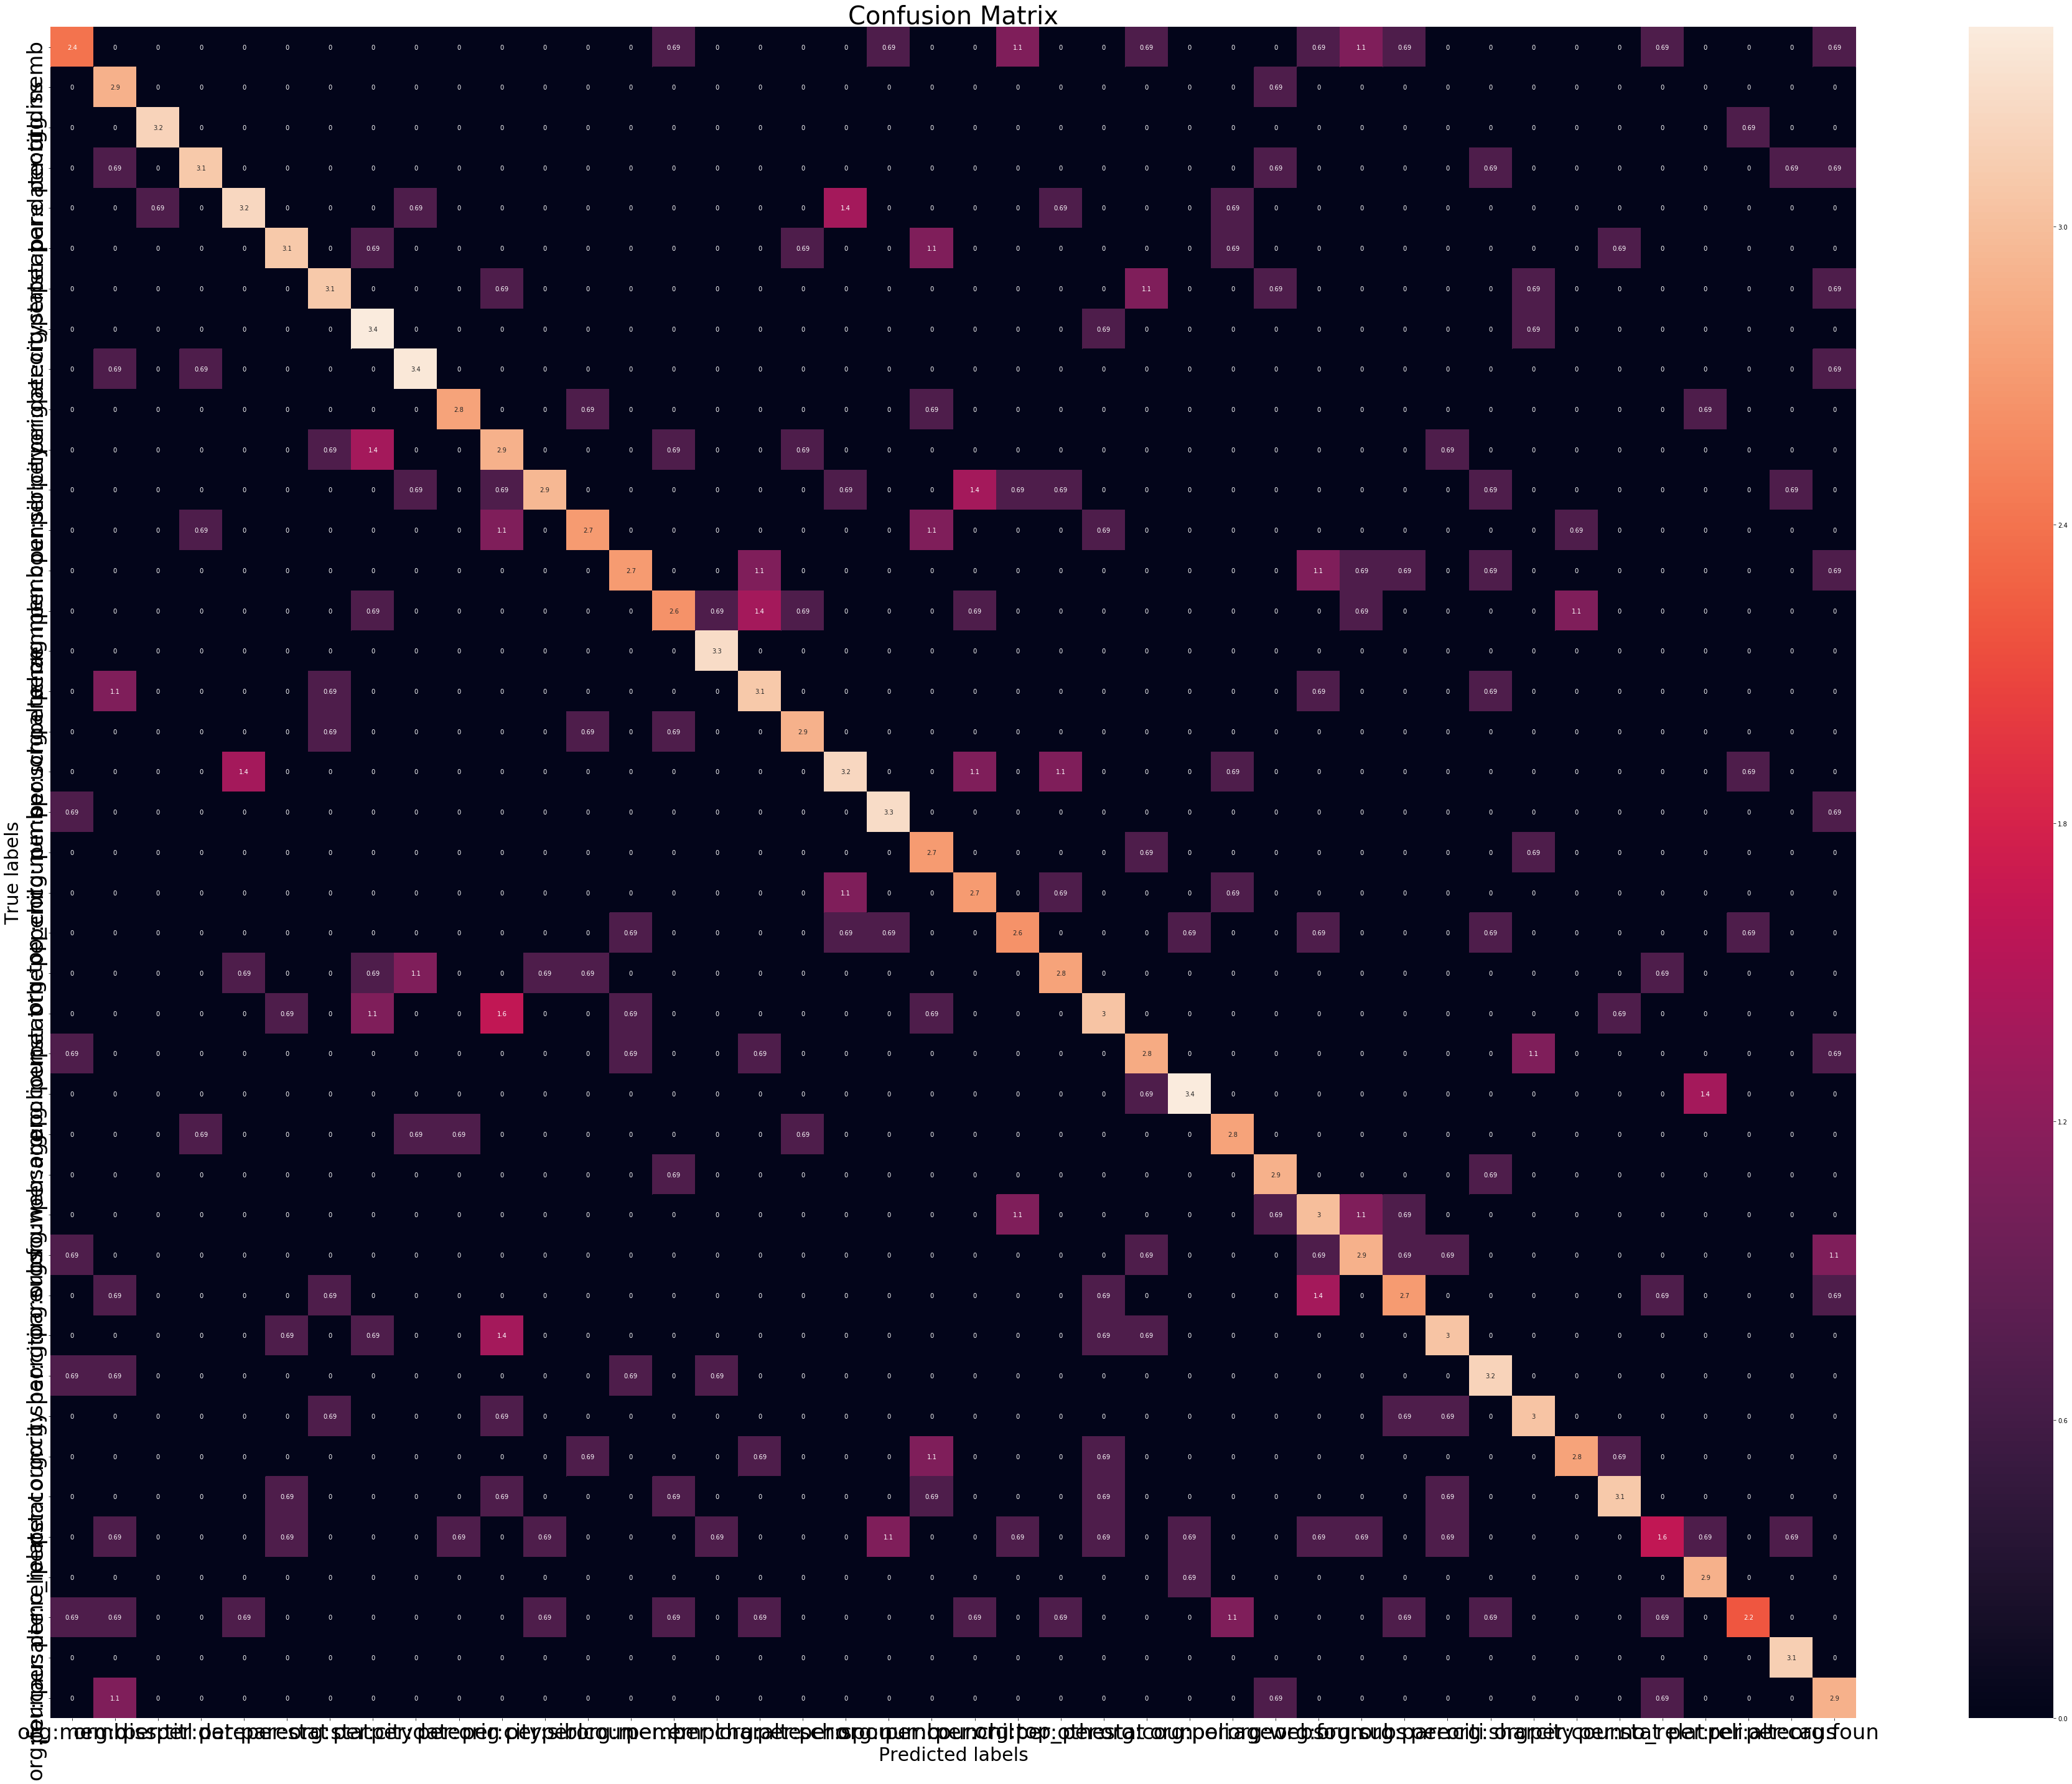

In [20]:
import seaborn as sns

fig = plt.figure(figsize=(65,50))
# ax = fig.add_subplot(111)
ax= plt.subplot()
sns.heatmap(lcm, annot=True, ax = ax) #annot=True to annotate cells
# sns.set(font_scale=-4.4)
# labels, title and ticks

ax.set_xlabel('Predicted labels',fontsize=30);ax.set_ylabel('True labels',fontsize=30); 
ax.set_title('Confusion Matrix',fontsize=40); 
ax.xaxis.set_ticklabels([x[:8] for x in result_per_type.keys()],fontsize=34)
ax.yaxis.set_ticklabels([x[:8] for x in result_per_type.keys()],fontsize=34)



In [21]:
this_dict = {}
for k,v in wrong_prediction_which_rel.items():
    this_dict[k] = [rel_type for rel_type,count in v.most_common()[:5]]
this_dict

{'per:parents': ['per:spouse',
  'per:title',
  'per:other_family',
  'per:age',
  'per:date_of_birth'],
 'per:city_of_birth': ['per:city_of_death',
  'per:schools_attended',
  'per:cities_of_residence',
  'org:stateorprovince_of_headquarters',
  'per:employee_of'],
 'per:spouse': ['per:parents',
  'per:children',
  'per:other_family',
  'per:alternate_names',
  'per:age'],
 'org:top_members/employees': ['org:number_of_employees/members',
  'per:alternate_names',
  'org:member_of',
  'org:political/religious_affiliation',
  'org:founded_by'],
 'per:date_of_death': ['org:founded',
  'org:dissolved',
  'org:website',
  'per:cause_of_death',
  'org:shareholders'],
 'per:stateorprovince_of_death': ['per:country_of_birth',
  'per:stateorprovince_of_birth',
  'per:schools_attended',
  'per:age',
  'per:city_of_death'],
 'per:origin': ['per:country_of_death',
  'per:religion',
  'per:country_of_birth'],
 'per:siblings': ['per:children',
  'per:date_of_birth',
  'org:shareholders',
  'org:top_

In [22]:
# check agremment with the model prediction 
# try to come up with b=new baselines to show that data is no good
# Elmo should do worse?
# only entity type is helpful?
